In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Mall_Customers_cluster.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = data.drop(['CustomerID'],axis=1)
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
x['Genre'] = en.fit_transform(x['Genre'])

In [5]:
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [6]:
#to find optimal number of cluster by elbow method
from sklearn.cluster import KMeans

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'WCC')

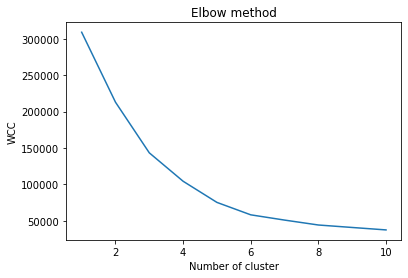

In [7]:
n = []
for i in range(1,11):
    model = KMeans(n_clusters=i , random_state=0)
    model.fit(x)
    n.append(model.inertia_)
plt.plot(range(1,11),n)
plt.title("Elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCC")
    

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

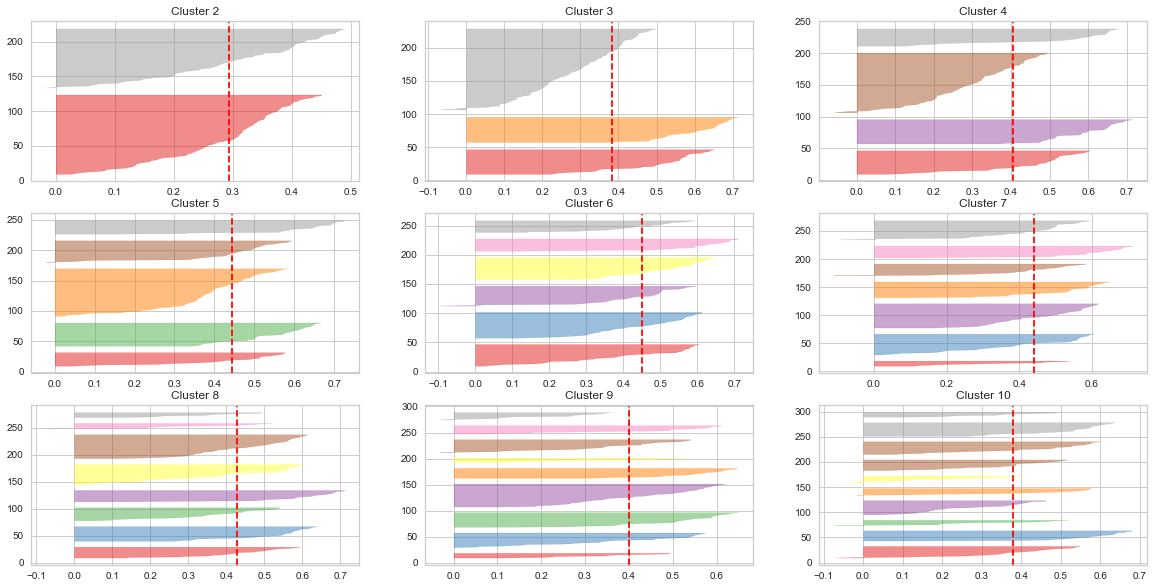

In [9]:
m = 0
fig,ax = plt.subplots(3,3,figsize = (20,10))
ax = ax.ravel()
for i in range(2,11):
    model = KMeans(n_clusters=i,random_state=0)
    vis = SilhouetteVisualizer(model,ax[m])
    ax[m].set_title(f"Cluster {i}")
    vis.fit(x)
    m+=1

In [10]:
model = KMeans(n_clusters=6,random_state=0)
y = model.fit_predict(x)

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.45205475380756527

In [12]:
#agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [13]:
import scipy.cluster.hierarchy as sch 

Text(0, 0.5, 'Euclidean Dist')

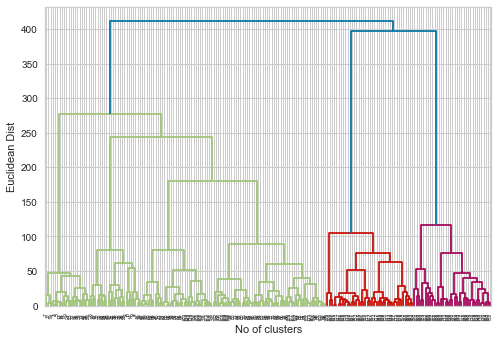

In [14]:
dendogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.xlabel('No of clusters')
plt.ylabel('Euclidean Dist')

In [15]:
model = AgglomerativeClustering(n_clusters=4)
y = model.fit_predict(x)
silhouette_score(x,y)

0.4102091359195185

In [16]:
model = AgglomerativeClustering(n_clusters=6)
y = model.fit_predict(x)
silhouette_score(x,y)

0.4428008535928764

In [17]:
#DBSCAN

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
X = data.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
from sklearn.cluster import DBSCAN

In [26]:
model = DBSCAN(eps=5,min_samples=4)
Y = model.fit_predict(X)
Y

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [27]:
# -1 represents noise for eps = 5 and min_samples = 4

np.unique(Y)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [28]:
silhouette_score(X,Y)

0.13799244650401032

In [29]:
model = DBSCAN(eps=10,min_samples=4)
Y = model.fit_predict(X)
silhouette_score(X,Y)

0.39889488555584734

In [30]:
model = DBSCAN(eps=12,min_samples=4)
Y = model.fit_predict(X)
silhouette_score(X,Y)

0.3455936875612336

In [32]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=4).fit(X)
dis,ind = model.kneighbors(X)

In [33]:
dis

array([[ 0.        ,  2.23606798,  7.21110255,  9.8488578 ],
       [ 0.        ,  4.12310563,  5.38516481,  5.38516481],
       [ 0.        ,  2.        ,  4.24264069,  8.06225775],
       [ 0.        ,  1.41421356,  4.        ,  4.12310563],
       [ 0.        ,  2.23606798,  6.40312424,  8.60232527],
       [ 0.        ,  1.41421356,  3.16227766,  4.24264069],
       [ 0.        ,  2.        ,  3.16227766,  7.07106781],
       [ 0.        ,  5.09901951,  6.40312424, 13.03840481],
       [ 0.        ,  3.16227766,  4.24264069,  6.32455532],
       [ 0.        ,  4.47213595,  5.09901951,  5.09901951],
       [ 0.        ,  1.41421356,  1.41421356,  8.06225775],
       [ 0.        ,  4.12310563,  5.09901951, 15.62049935],
       [ 0.        ,  1.41421356,  2.        ,  8.06225775],
       [ 0.        ,  2.        ,  3.16227766,  4.        ],
       [ 0.        ,  1.41421356,  2.        ,  7.28010989],
       [ 0.        ,  2.        ,  4.24264069,  4.47213595],
       [ 0.        ,  3.

In [34]:
dis = np.sort(dis,axis=0)
dis

array([[ 0.        ,  0.        ,  1.        ,  1.41421356],
       [ 0.        ,  0.        ,  1.        ,  1.41421356],
       [ 0.        ,  0.        ,  1.        ,  1.41421356],
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 0.        ,  1.

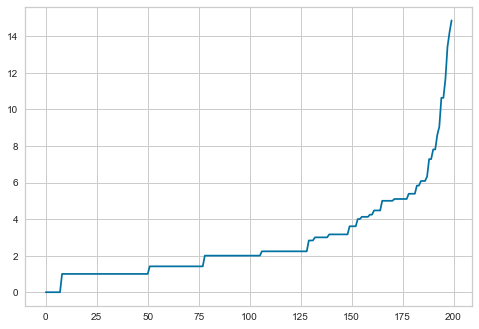

In [35]:
dis = dis[:,1]
plt.plot(dis)